# gavin_thesis_R

Gavin  
April 30, 2024

In [ ]:
#| label = "setup",
#| include = FALSE
knitr::opts_chunk$set(echo = TRUE)

In [ ]:
library(ggplot2)
library(ggstatsplot)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167


Attaching package: 'rstatix'

The following object is masked from 'package:stats':

    filter

Load main dataframe (change directory as needed) \*note: columns titled with with “Gavin_x_x” contain QSM data

In [ ]:
newdata <- read.csv("newdata.csv")

signif="***"
notsig="n.s."

sigfunc <- function(pval) {
if (pval < 0.05){
  label = signif
} else {
    label = notsig
}
  return (label)
}

Dataframes for figures

In [ ]:
#| echo = FALSE

#QSM chi data - SSS vs. CCV
comp_legit_starfsl <- data.frame(
  Chi = c(newdata$Gavin_SSS_Chi, newdata$Gavin_IntVein_Chi),
  Vein = c(rep("Superior Sagittal Sinus", 19), rep("Central Cerebral Veins", 19))
)

#QSM CSvO2 data - SSS vs. CCV
comp_SSS_IntVein_CSvO2 <- data.frame(
  CSvO2 = c(newdata$Gavin_IntVein_CSvO2, newdata$Gavin_SSSVein_CSvO2),
  Vein = c(rep("Central Cerebral Veins", 19), rep("Superior Sagittal Sinus", 19))
)

#Chisep chi data - SSS vs. CCV
comp_chisep_chi <- data.frame(
  Chi = c(newdata$Chisep_IntVein_Chi, newdata$Chisep_SSS_Chi),
  Vein = c(rep("Central Cerebral Veins", 19), rep("Superior Sagittal Sinus", 19))
)

#Chisep CSvO2 data - SSS vs. CCV
comp_chisep_CSvO2 <- data.frame(
  CSvO2 = c(newdata$Chisep_IntVein_CSvO2, newdata$Chisep_SSSVein_CSvO2),
  Vein = c(rep("Central Cerebral Veins", 19), rep("Superior Sagittal Sinus", 19))
)

#QSM SSS chi vs. chisep SSS chi
comp_SSS_chi <-  data.frame(
  "Measured Susceptibility" = 
    c(newdata$Gavin_SSS_Chi, newdata$Chisep_SSS_Chi),
  Method = c(rep("QSM", 19), rep("Paramagnetic Component", 19))
)

#QSM CCV chi vs. chisep CCV chi
comp_CCV_chi <- data.frame(
  Chi = 
    c(newdata$Gavin_IntVein_Chi, newdata$Chisep_IntVein_Chi),
  Method = c(rep("QSM", 19), rep("Paramagnetic Component", 19))
)

#QSM SSS SvO2 vs. chisep SSS SvO2
comp_SSS_SvO2 <- data.frame(
  "Oxygen Saturation" = 
    c(newdata$Gavin_SSSVein_CSvO2, newdata$Chisep_SSSVein_CSvO2),
  Method = c(rep("QSM", 19), rep("Paramagnetic Component", 19))
)

#QSM CCV SvO2 vs. chisep CCV SvO2
comp_CCV_SvO2 <- data.frame(
  "Oxygen Saturation" = 
    c(newdata$Gavin_IntVein_CSvO2, newdata$Chisep_IntVein_CSvO2),
  Method = c(rep("QSM", 19), rep("Paramagnetic Component", 19))
)

In [ ]:
#SSS Chi
SSSChi.t <- tidy(t.test(newdata$Gavin_SSS_Chi, newdata$Chisep_SSS_Chi,
            paired = TRUE, conf.int = TRUE))

#SSS SvO2
SSSSvO2.t <- tidy(t.test(newdata$Gavin_SSSVein_CSvO2, newdata$Chisep_SSSVein_CSvO2,
            paired = TRUE, conf.int = TRUE))

#CCV Chi
CCVChi.t <- tidy(t.test(newdata$Gavin_IntVein_Chi, newdata$Chisep_IntVein_Chi, paired = TRUE,
            conf.int = TRUE))

#CCV SvO2
CCVSvO2.t <- tidy(t.test(newdata$Gavin_IntVein_CSvO2, newdata$Chisep_IntVein_CSvO2,
            paired = TRUE, conf.int = TRUE))

Figure 3.1

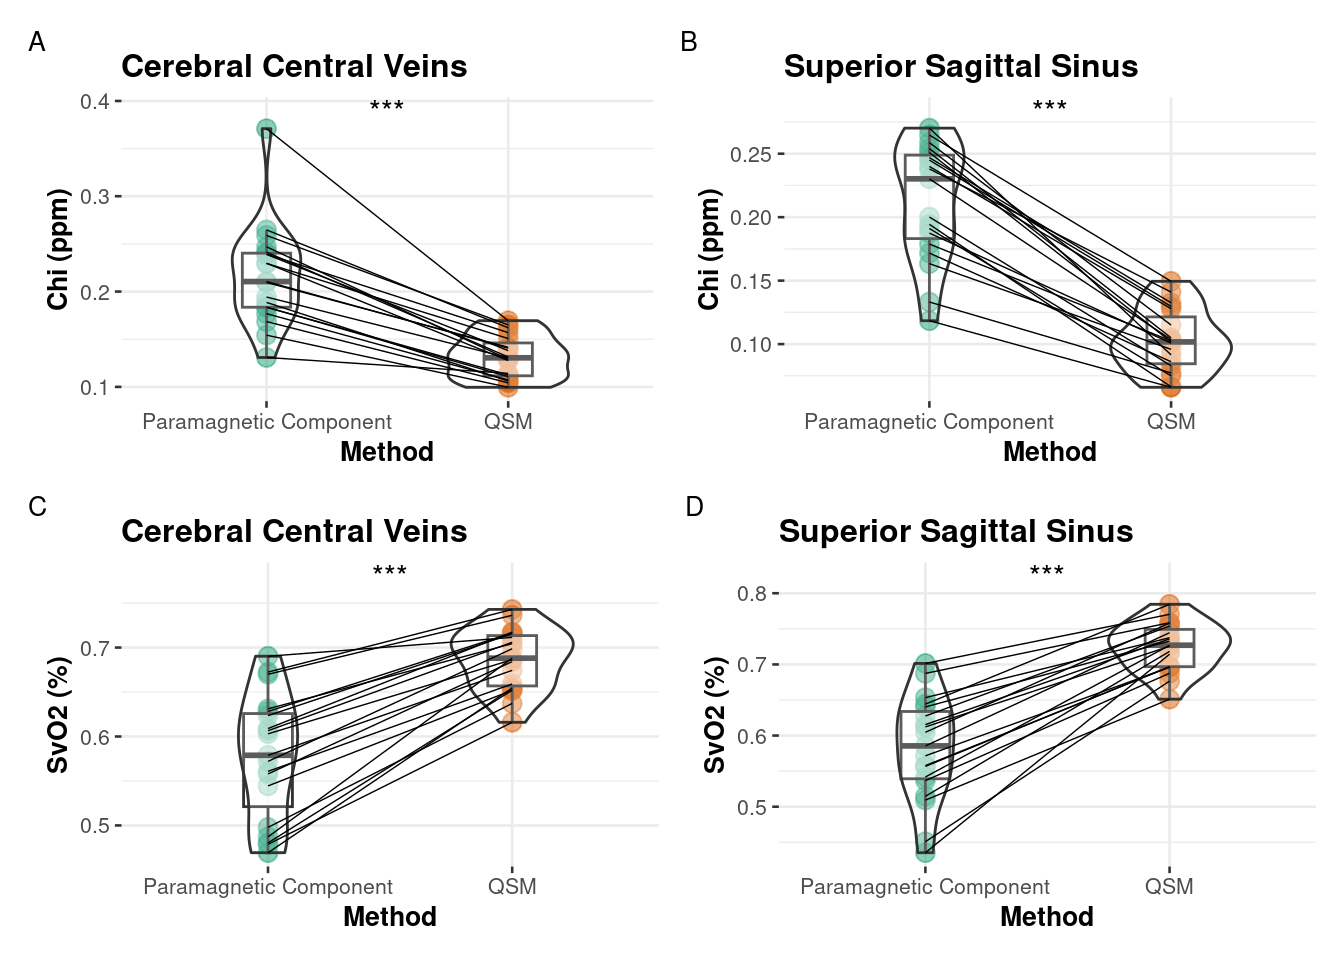

In [ ]:
#| echo = FALSE
label = sigfunc(SSSChi.t$p.value)
m1 <- ggwithinstats(
  data = comp_CCV_chi,
  x = Method,
  y = Chi,
  title = "Cerebral Central Veins",
  ylab = "Chi (ppm)",
  results.subtitle = FALSE,
  type = "p",
  pairwise.display = "all",
  bf.message = FALSE,
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid")) +
  ggplot2::annotate("text", x=1.5, y=(max(comp_CCV_chi$Chi)*1.05), size=4, label = label)

label = sigfunc(SSSSvO2.t$p.value)
m2 <- ggwithinstats( 
  data = comp_SSS_chi,
  x = Method,
  y = Measured.Susceptibility, 
  title = "Superior Sagittal Sinus",
  ylab = "Chi (ppm)",
  results.subtitle = FALSE,
  type = "p",
  pairwise.display = "all",
  bf.message = FALSE,
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid")) +
  ggplot2::annotate("text", x=1.5, y=(max(comp_SSS_chi$Measured.Susceptibility)*1.05), size=4, label = label )

label = sigfunc(CCVChi.t$p.value)
m3 <- ggwithinstats(
  data = comp_CCV_SvO2,
  x = Method,
  y = Oxygen.Saturation,
  title = "Cerebral Central Veins",
  ylab = "SvO2 (%)",
  results.subtitle = FALSE,
  type = "p",
  pairwise.display = "all",
  bf.message = FALSE,
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid") ) +
  ggplot2::annotate("text", x=1.5, y=(max(comp_CCV_SvO2$Oxygen.Saturation)*1.05), size=4, label = label )

label = sigfunc(CCVSvO2.t$p.value)
m4 <- ggwithinstats(
  data = comp_SSS_SvO2,
  x = Method,
  y = Oxygen.Saturation,
  title = "Superior Sagittal Sinus",
  ylab = "SvO2 (%)",
  results.subtitle = FALSE,
  type = "p",
  pairwise.display = "all",
  bf.message = FALSE,
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid") ) +
  ggplot2::annotate("text", x=1.5, y=(max(comp_SSS_SvO2$Oxygen.Saturation)*1.05), size=4, label = label )
(patch1 <- (m1 + m2)/(m3 + m4) + 
  plot_annotation(tag_levels = 'A') & 
  theme(plot.tag = element_text(size = 10)))

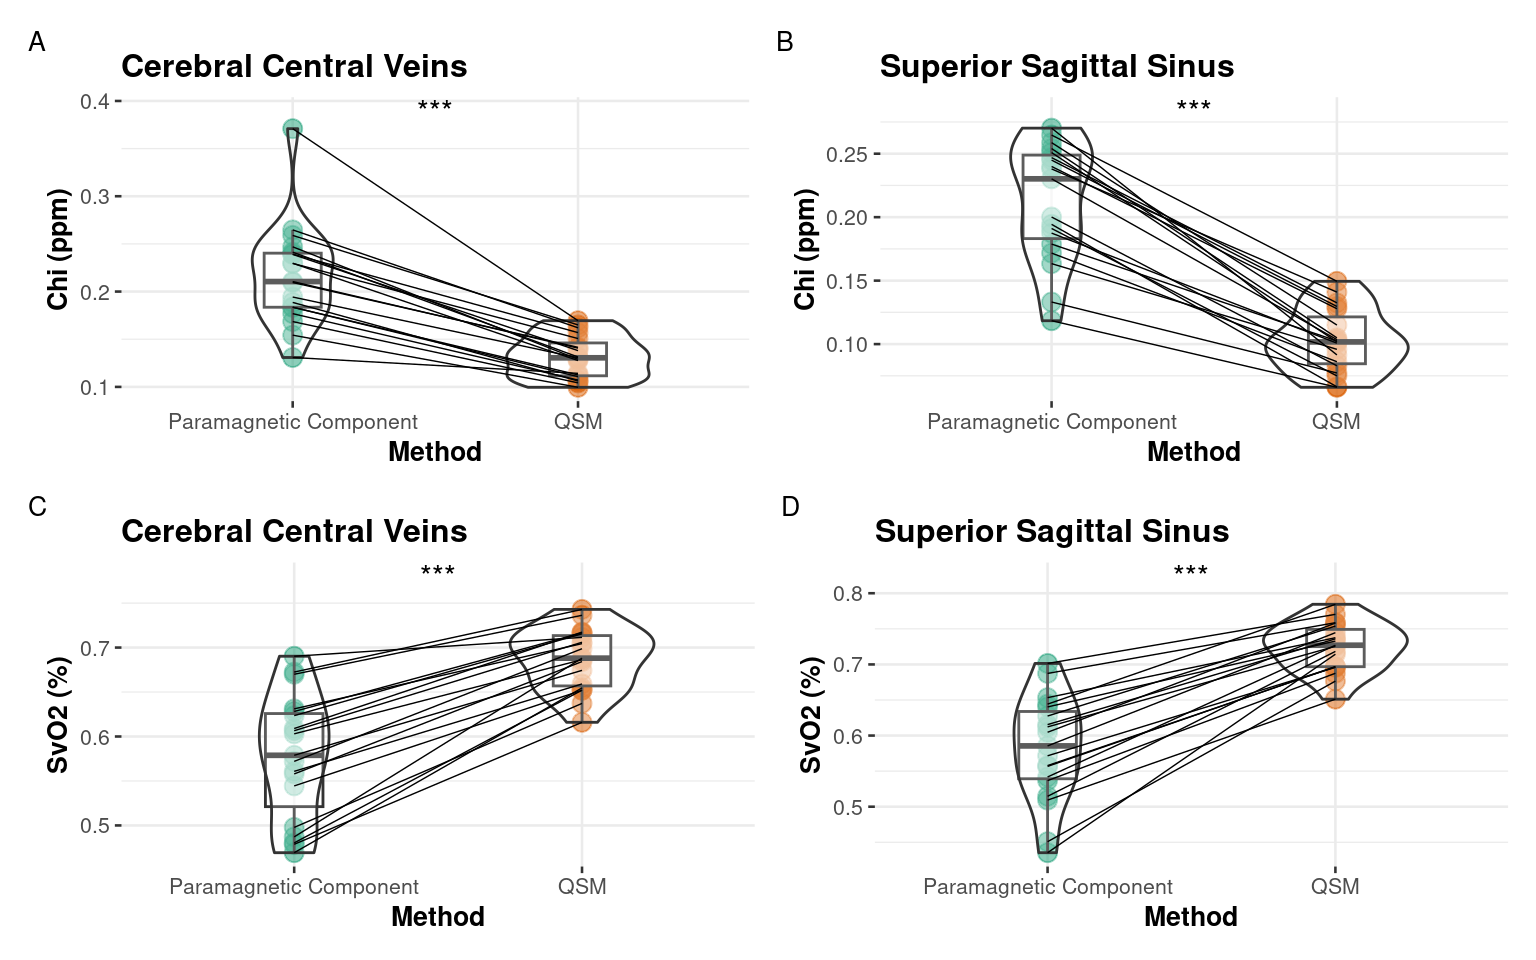

In [ ]:
#| label: fig-methodplot
#| fig-width: 8
#| fig-height: 5
#| fig-cap: "**Vein-specific susceptibility and oxygen saturation values by method.** (A, B) contains violin plots comparing subject chi (ppm) acquired from the cerebral central veins; (C, D) contains violin plots comparing subject SvO2 (%) acquired from the superior sagittal sinus. Raw data points from paramagnetic maps are shown as filled green circles and raw data points from QSM are shown as filled orange circles. Each line connects the raw data points of a single subject. (***) indicates P<0.05."
patch1

In [ ]:
ggsave("Figure4.png", plot = patch1, dpi = 300, width = 8, height = 5, units = "in")

# Region analysis: Chi and CSvO2

In [ ]:
#SSS Chi
RegionQSMChi.t <- tidy(t.test(newdata$Gavin_IntVein_Chi, newdata$Gavin_SSS_Chi, 
            paired = TRUE, conf.int = TRUE))

#SSS SvO2
RegionQSMSvO2.t <- tidy(t.test(newdata$Gavin_IntVein_CSvO2, newdata$Gavin_SSSVein_CSvO2,
            paired = TRUE, conf.int = TRUE))

#CCV Chi
RegionChisepChi.t <- tidy(t.test(newdata$Chisep_IntVein_Chi, newdata$Chisep_SSS_Chi, paired = TRUE,
            conf.int = TRUE))

#CCV SvO2
RegionChisepSvO2.t <- tidy(t.test(newdata$Chisep_IntVein_CSvO2, newdata$Chisep_SSSVein_CSvO2,
            paired = TRUE, conf.int = TRUE))

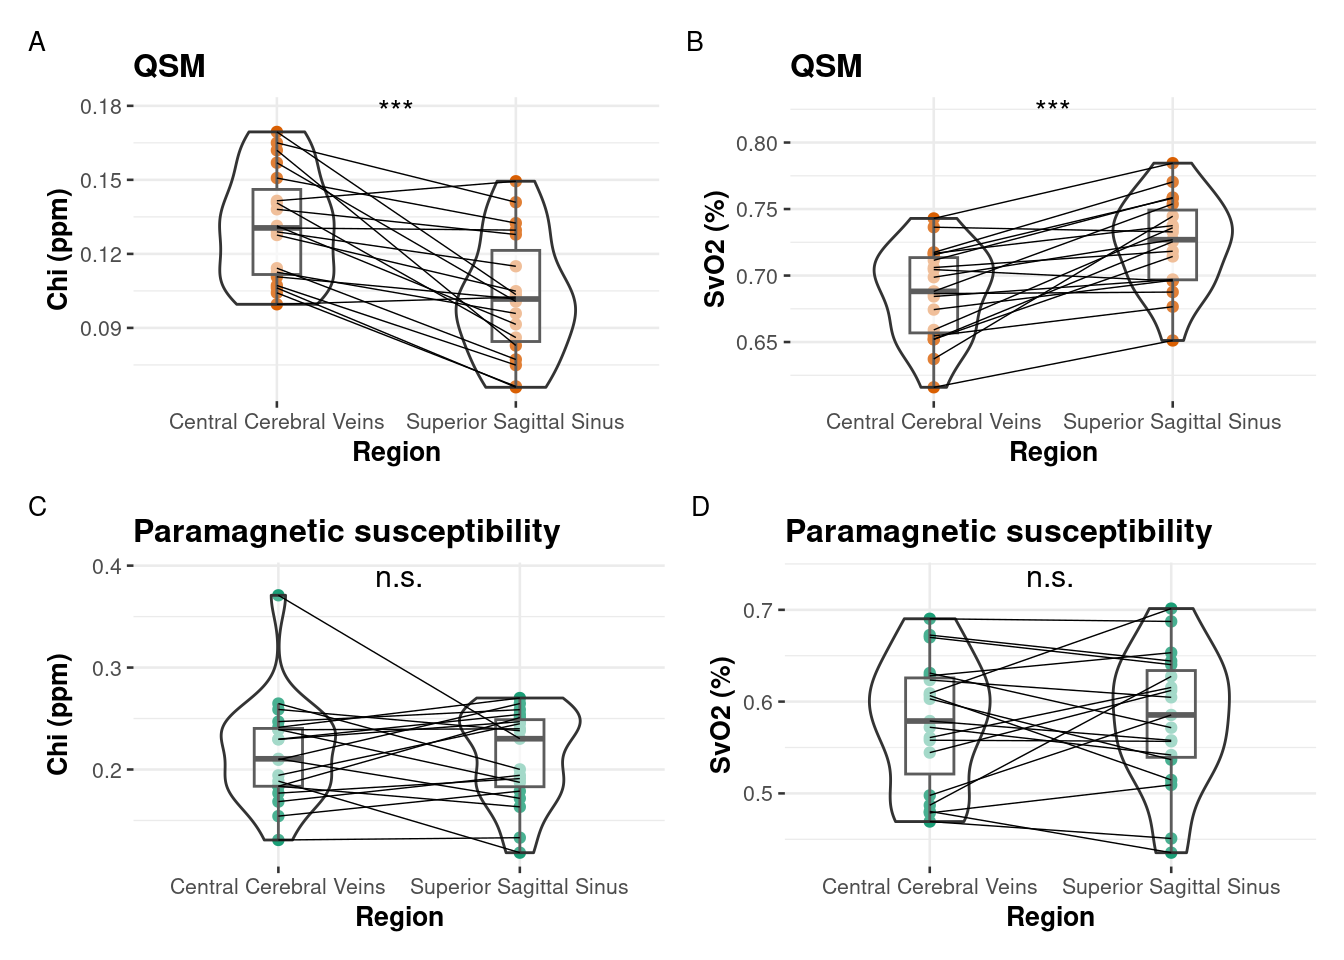

In [ ]:
label = sigfunc(RegionQSMChi.t$p.value)
 p1 <- ggwithinstats(
  data = comp_legit_starfsl,
  x = Vein,
  y = Chi,
  results.subtitle = FALSE,
  type = "p",
  pairwise.display = "all",
  bf.message = FALSE,
  xlab = "Region",
  ylab = "Chi (ppm)",
  title = "QSM",
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid"),
  point.args = list(color = "#D95F02")) + 
  ggplot2::annotate("text", x=1.5, y=(max(comp_legit_starfsl$Chi)*1.05), size=4, label = label)

label = sigfunc(RegionQSMSvO2.t$p.value)
p2 <- ggwithinstats(
  data = comp_SSS_IntVein_CSvO2,
  x = Vein,
  y = CSvO2,
  title = "QSM",
  results.subtitle = FALSE,
  type = "p",
  pairwise.display = "all",
  bf.message = FALSE,
  xlab = "Region",
  ylab = "SvO2 (%)",
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid"),
  point.args = list(color = "#D95F02")
) + 
  ggplot2::annotate("text", x=1.5, y=(max(comp_SSS_IntVein_CSvO2$CSvO2)*1.05), size=4, label = label)

label = sigfunc(RegionChisepChi.t$p.value)
p3 <- ggwithinstats(                     #boxplot of chi comparison between regions
  data = comp_chisep_chi,
  x = Vein,
  y = Chi, 
  title = "Paramagnetic susceptibility",
  results.subtitle = FALSE,
  pairwise.display = "all",
  bf.message = FALSE,
  xlab = "Region",
  ylab = "Chi (ppm)",
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid"),
  point.args = list(color = "#1B9E77")
) +
  ggplot2::annotate("text", x=1.5, y=(max(comp_chisep_chi$Chi))*1.05, size=4, label = label)

label = sigfunc(RegionChisepSvO2.t$p.value)
p4 <- ggwithinstats(                    #boxplot of svo2 comparison between regions
  data = comp_chisep_CSvO2,
  x = Vein,
  y = CSvO2, 
  title = "Paramagnetic susceptibility",
  results.subtitle = FALSE,
  pairwise.display = "all",
  bf.message = FALSE,
  xlab = "Region",
  ylab = "SvO2 (%)",
  type = "nonparametric",
  centrality.plotting = FALSE,
  point.path.args = list(linewidth = 0.25, linetype = "solid"),
  point.args = list(color = "#1B9E77")
) +
  ggplot2::annotate("text", x=1.5, y=(max(comp_chisep_CSvO2$CSvO2)*1.05), size=4, label = label)

(patch2 <- (p1 + p2)/(p3 + p4) + 
  plot_annotation(tag_levels = 'A') & 
  theme(plot.tag = element_text(size = 10)))

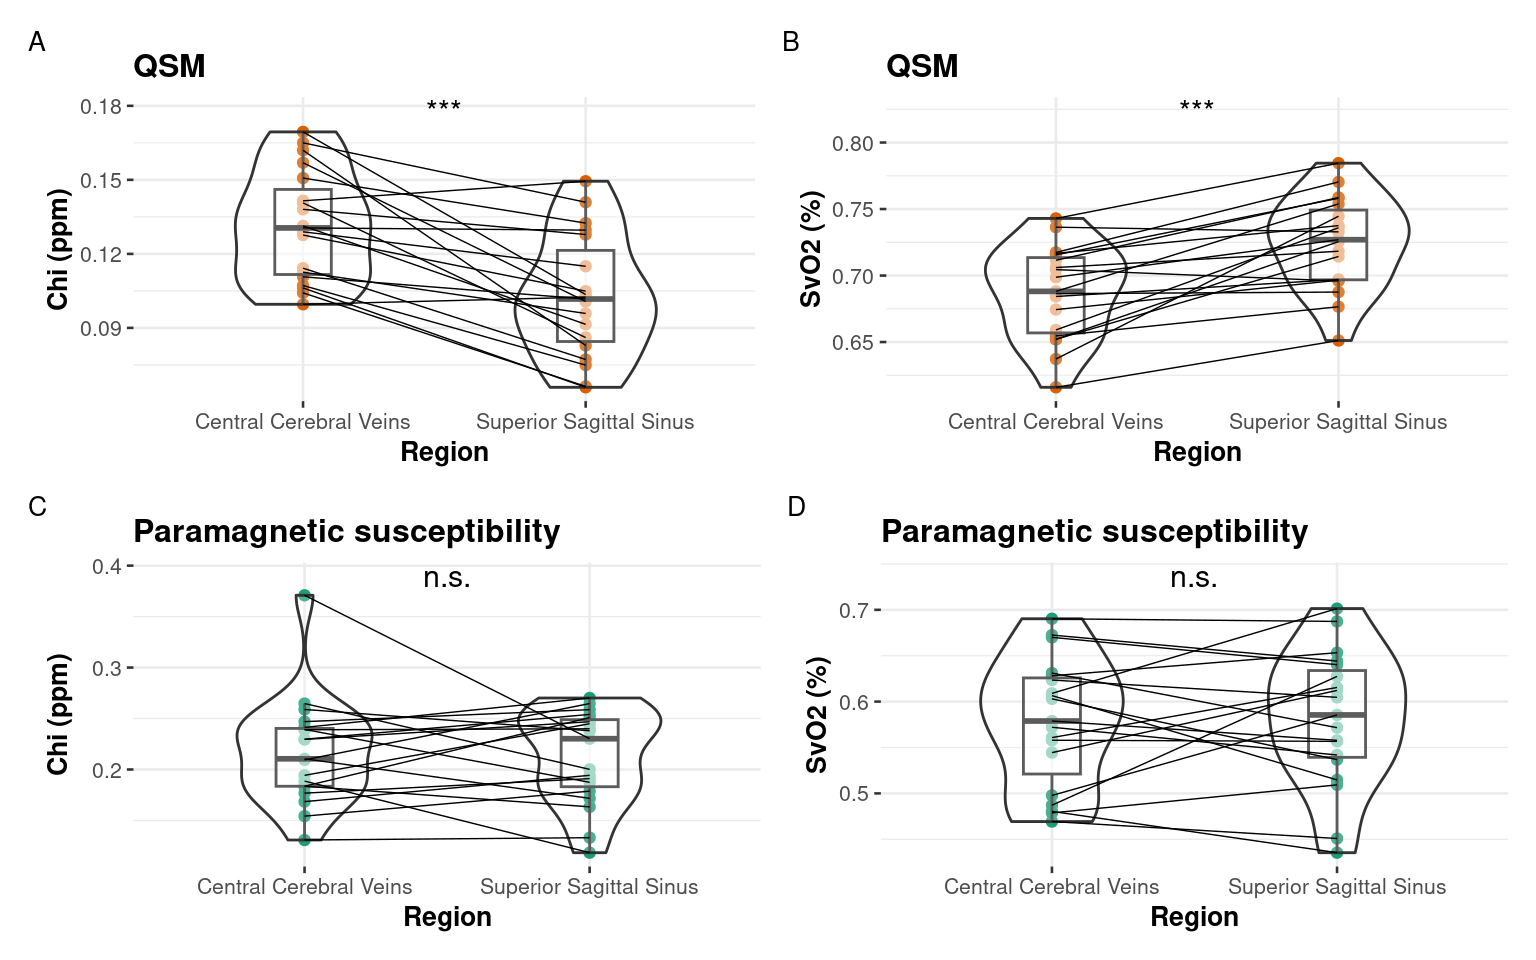

In [ ]:
#| label: fig-regionplot
#| fig-width: 8
#| fig-height: 5
#| fig-cap: "**Inter-venous comparisons of susceptibility and oxygen saturation**. Violin plots comparing (A, C) chi (ppm) and (B, D) SvO2 (%) between the CCV and the SSS. Panels (A) and (B) used data acquired from QSM, and its raw data points are shown as filled orange circles. Panels (C) and (D) used data acquired from paramagnetic maps, and its raw data points are shown as filled green circles. Each line connects the raw data points of a single subject. (***) indicates p<0.05; (n.s.) indicates no significant difference."
patch2

In [ ]:
ggsave("Figure5.png", plot = patch2, dpi = 300, width = 8, height = 5, units = "in")

In [ ]:
save.image('results.RData')